<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/backpropagation/mlp123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep MLP project

#Implement MLP

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical  
from os import path, getcwd, chdir
import numpy as np

In [110]:
x = np.linspace(0,1,200,dtype=np.float16)
np.random.shuffle(x)


In [109]:
class Layer:
  def __init__(self,node_number):
    
    self.node_num = node_number
    self.delta = np.empty(node_number)
    self.vj = np.empty(node_number)
    self.outj = np.empty(node_number)
    self.b = np.zeros((self.node_num, 1)) 

  def define_weights(self,input_shape):
    self.weights = np.random.uniform(low=0, high=1, size=(self.node_num,input_shape))
   

In [113]:
import numpy as np

class Model:
  def __init__(self,learning_rate,epochs):
    self.layers = np.empty(0,dtype=Layer)
    self.lr = learning_rate
    self.epochs = epochs

  def Dense(self,node_number):
    self.layers = np.append(self.layers,Layer(node_number))

  def Train(self,training,training_y):
    try:
      self.training = training.reshape(training.shape[0],training.shape[1]*training.shape[2])
    except:
      self.training = np.expand_dims(training,1)
    self.desiered_labels = training_y
    self._define_weights()
    while self.epochs>0:
      print(self.epochs)
      self.epochs -=1
      for tr in range(0,self.training.shape[0]):
        yhat = self._forward_propagation(tr)
        self._update_weights(yhat,tr)

  def _define_weights(self):
    self.layers[0].define_weights(self.training[0].shape[0])
    for i in range(1,self.layers.shape[0]):
      self.layers[i].define_weights(self.layers[i-1].node_num)

  def _forward_propagation(self,tr):
    yhat = self._layer_output(self.training[tr] ,0)
    for i in range(1,self.layers.shape[0]):
      yhat = self._layer_output(yhat ,i)
    # print( yhat)
    return yhat

  def _layer_output(self,x,i):
    yhat = np.dot(self.layers[i].weights,x)
    if i!= self.layers.shape[0]:
      yhat = self._sigmoid(yhat)
    self.layers[i].yj = yhat
    return yhat

  def _update_weights(self,yhat,tr):
    fiprim = self._d_sigmoid(self.layers[-1-1].yj)
    fiprim = np.expand_dims(fiprim,1).T
    self.layers[-1].delta  = (fiprim * (self.desiered_labels[tr]-self.layers[-1].yj))
    # print(self.desiered_labels[tr]-self.layers[-1-1].yj)
    for i in range(len(self.layers)-2,-1,-1):
      self._delta(i,tr)
    for i in range(len(self.layers)-1,-1,-1):
      yj =np.expand_dims(self.layers[i].yj,1)
      delta = self.layers[i].delta
      deltaw = self.lr * delta * yj
      # print(delta)
      self.layers[i].weights = self.layers[i].weights + deltaw

  def _delta(self,i,tr):
    if i == 0: 
      input = self.training[tr]
    else:
      input = self.layers[i-1].yj
    fiprim =  self._d_sigmoid(input)
    fiprim = np.expand_dims(fiprim,1)
    sum_delta_w = np.sum((self.layers[i+1].weights*self.layers[i+1].delta).T,1)
    self.layers[i].delta =  (fiprim * sum_delta_w).T

  def _sigmoid(self,x):
    return x*(x>0)
    return np.power(1+np.exp(-0.5*x),-1)
    
  def _d_sigmoid(self,x):
    return 1.*(x>0)
    return self._sigmoid(x)*(1-self._sigmoid(x))
  
  def Test(self,test_images,testing_label):
    try:
      testings = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
    except:
      testings = test_images
    for t in range(0,testings.shape[0]):
      yhat = self._layer_output(testings[t] ,0)
      for i in range(1,self.layers.shape[0]):
        yhat = self._layer_output(yhat ,i)
      print(yhat , testing_label[t])

In [78]:
x[35]

78.4

In [114]:
a = Model(0.01,10)
a.Dense(4)
a.Dense(1)
a.Train(x[10:40],x[10:40])
a.Test(x[10:40], x[10:40])
# to_categorical(training_y, num_classes)

10
9
8
7
6
5
4
3
2
1
[[0.37903865]] 0.387
[[0.39864822]] 0.407
[[0.27572969]] 0.2815
[[0.58589571]] 0.598
[[0.22144466]] 0.2261
[[0.08369939]] 0.08545
[[0.3199708]] 0.3267
[[0.42830172]] 0.4373
[[0.23627141]] 0.2412
[[0.95512957]] 0.975
[[0.35942908]] 0.367
[[0.54619828]] 0.5576
[[0.88577865]] 0.9043
[[0.64950724]] 0.663
[[0.71359706]] 0.7285
[[0.84177669]] 0.8594
[[0.70403141]] 0.7188
[[0.6399416]] 0.6533
[[0.74803337]] 0.7637
[[0.46273804]] 0.4724
[[0.76286012]] 0.779
[[0.77768687]] 0.794
[[0.10827114]] 0.11053
[[0.94986847]] 0.9697
[[0.38884344]] 0.397
[[0.15747442]] 0.1608
[[0.14766963]] 0.1508
[[0.75329448]] 0.769
[[0.20183509]] 0.206
[[0.00984215]] 0.01005


In [82]:
a.Test(x[10:40], x[10:40])

AttributeError: ignored

In [ ]:
#show classificaion and error
import matplotlib.pyplot as plt

nerr =np.arange(0,a.err.shape[0])
print(a.err.shape[0])
plt.plot(nerr,a.err,'r')
plt.show()

In [49]:
import numpy as np
class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    def backpropagation(self,y, z_s, a_s):
            dw = []  # dC/dW
            db = []  # dC/dB
            deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
            # insert the last layer error
            deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
            # Perform BackPropagation
            for i in reversed(range(len(deltas)-1)):
                deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
            #a= [print(d.shape) for d in deltas]
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
            # return the derivitives respect to weight matrix and biases
            return dw, db
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
# update weights and biases based on the output
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1
if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
    y = np.sin(X)
    
    nn.train(X, y, epochs=10000, batch_size=64, lr = .1)

Streaming output truncated to the last 5000 lines.
loss = 15.447673658163579
loss = 15.447651378922675
loss = 15.447629108384694
loss = 15.447606846544623
loss = 15.447584593397451
loss = 15.447562348938169
loss = 15.447540113161775
loss = 15.447517886063272
loss = 15.44749566763766
loss = 15.447473457879955
loss = 15.447451256785165
loss = 15.4474290643483
loss = 15.447406880564388
loss = 15.447384705428446
loss = 15.447362538935508
loss = 15.447340381080597
loss = 15.44731823185875
loss = 15.447296091265008
loss = 15.44727395929441
loss = 15.447251835942
loss = 15.44722972120283
loss = 15.447207615071951
loss = 15.447185517544419
loss = 15.447163428615296
loss = 15.447141348279645
loss = 15.447119276532533
loss = 15.44709721336903
loss = 15.447075158784216
loss = 15.447053112773164
loss = 15.447031075330957
loss = 15.447009046452685
loss = 15.446987026133431
loss = 15.446965014368292
loss = 15.446943011152364
loss = 15.446921016480749
loss = 15.446899030348549
loss = 15.4468770527508

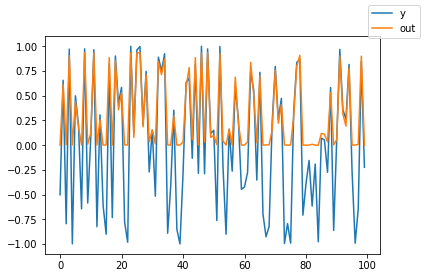

In [51]:
    _, a_s = nn.feedforward(X)
    #print(y, X)
    plt.plot(y.flatten()[:100])
    plt.plot( a_s[-1].flatten()[:100])
    plt.figlegend(['y','out'])
    plt.show()

In [ ]:
y.flatten()